In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Import dependencies</h1>

In [2]:
# Math modules
import numpy as np
import numpy.random as rnd
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# to load images for this tutorial
from IPython.display import Image
import os
path = os.getcwd()

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<hr style="border-top: 3px solid Black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
    <center><h1>The need for learning curves; a case study using non-linear data.</h1></center>
<ul>
<li>Linear models are typically considered for data that scatters in a single direction (correlate).</li><br>    
<li>In many cases, data will be more complex than a straight line, calling for a more nuanced approach.</li><br>
<li>Linear models can be used to fit nonlinear data.</li><br>
<li>One method is to add new features that contains the powers of the original features.</li><br>
<li>A linear model can then be trained on this new extended data, and this technique is called <font color="red"><strong><em>Polynomial regression</em></strong></font>.</li><br>
<li>Using learning curves on a model can help determine if the initial machine learning algorithm used is not complex enough, or too complex</li><br>
    <li>In this example, we will use learning curves to confirm that a polynomial regression is appropriate for data that is nonlinear.</li><br>
    <li>This example, will also help illustrate how to evaluate the behaviors of the learning curve, and use this information to diagnose underfitting, or overfitting.</li>        
</ul>
</div>

<h1>Generate Nonlinear Data based on a simple quadratic equation</h1>

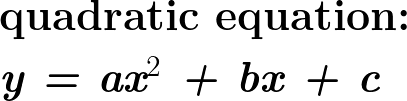

In [3]:
image = os.path.join(path, 'images/quadratic_form.png')
Image(filename=image)

In [4]:
m = 150
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

<h1>Function used in this example</h1>

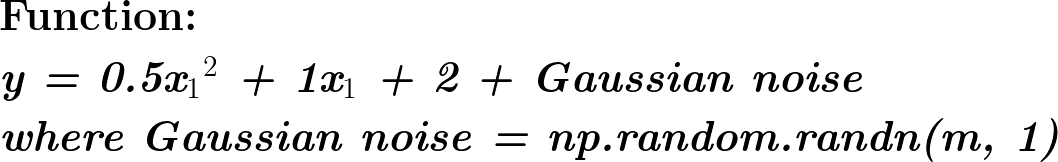

In [5]:
image = os.path.join(path, 'images/example_function.png')
Image(filename=image)

<div style="font-size:16px; border:1px solid black; padding:10px">
            <center><h3>Convert linear data into a quadratic form.</h3></center><br>
The x values were generated by using <code>np.random.rand()</code><br>
    where the parameters (m, 1):
    <ul>
<li><code>m</code> is the length of the array</li>
<li><code>1</code> the dimensions of the array</li>
<li>each random value in this array is multiplies by 6, and then subtracted by 3</li>
    </ul>        
<br>
The y values were generated by using the quadratic formula<code>0.5 * X**2 + X + 2 + np.random.randn(m, 1)</code><br>
    where:
        <ul>
<li><code>np.random.randn(m, 1)</code> is random noise</li>
<li><code>y</code> is a polynomial of degree 2.</li>
<li>documentation: <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html">numpy.random.rand</a></li>
    </ul>          
</div>

<h1>Plot Data and Linear Regression Curve</h1>

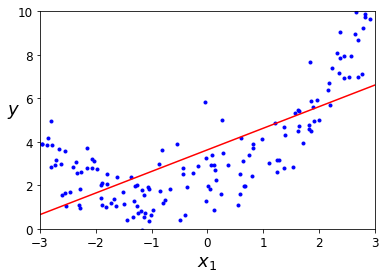

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# predict y from the data
x_new = np.linspace(-3, 4, 200)
y_new = model.predict(x_new[:, np.newaxis])


plt.plot(X, y, "b.")
plt.plot(x_new, y_new, "r-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("images/scatter_lin_reg_plot.png", bbox_inches='tight')
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Scatter plot has u-shape.</h3></center>
<ul>
<li>A straight regression line will not fit this data properly, and would yield a high cost function (big errors in predictions).</li><br>
    <li>A different approach will be needed to build a model that more closely follows the shape of this data</li><br>
    <li>Since this data has a u-shape, then a polynomial function is better suited than a standard linear model</li><br>
<li>The data can be transformed using Scikit-Learn <code>polynomialFeatures</code> class that will have polynomial features.</li><br>
<li>Documentation (link valid as of 9/14/20): <a href="https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features">Generating polynomial features</a></li><br>   
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Generating polynomial features using sklearn <code>PolynomialFeatures()</code></h1>

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

<h3>Inspect Transformation</h3>

In [8]:
print('The original feature {},\nThe transformed features{}'.format(X[0], X_poly[0]))

The original feature [-0.75275929],
The transformed features[-0.75275929  0.56664654]


<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Preparing nonlinear data for linear regression.</h3></center>
<ul>
    <li><code>X_poly</code> now has two values for the first element in the array.</li><br>    
    <li>The first instance is the original <code>x</code> value</li><br>
    <li>The second instance is the square of that feature <code>x**2</code></li><br>
    <li>A linear regression can now be used on this data set.</li><br>
    <li><code>PolynomialFeatures(degree=d)</code> transforms an array containing <code>n</code> number of features into an array containing <code>(n+d)!/d!n!</code> number of features.</li><br>
    <li>Linear regression can now be performed on this new dataset.</li><br>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Linear Regression on Transformed Data</h1>

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01256901]), array([[1.03005099, 0.5123555 ]]))

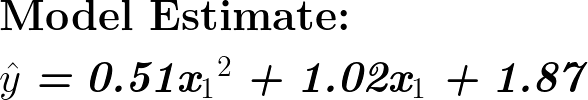

In [10]:
image = os.path.join(path, 'images/model_estimate.png')
Image(filename=image)

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Comments.</h3></center>
<ul>
    <li>The model estimate is very close to the original function.<br>    
    <li><code>PolynomialFeatures</code> adds up all combinations of features up to a given degree</li><br>
    <li>The second instance is the square of that feature <code>x**2</code></li><br>
    <li>A linear regression can now be used on this data set</li><br>
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>Plot Data with Linear Regression Curve that used Transformed Data</h1>

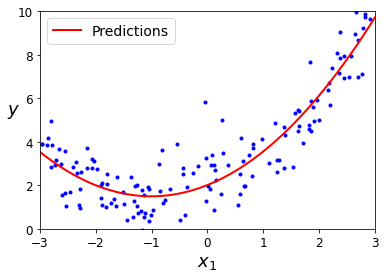

In [11]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.savefig("images/polynomimal_plot_linreg.png", bbox_inches='tight')
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Comments.</h3></center>
<ul>
    <li>Using the transformed data allowed the linear regression model to learn the data better.</li><br>      
    <li>The prediction curve now more closely fits the shape of the data.</li><br>
    <li>Improved learning may yield better predictions.</li><br>
    <li>The current red line provides a good estimate, but higher dimensional models can be developed that allow the red curve to oscillate around each point</li><br>
    <li>High dimensional polynomial regression can improve how the algorithm learns the data.</li><br>     
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<h1>High-Degree Polynomial Regression</h1>

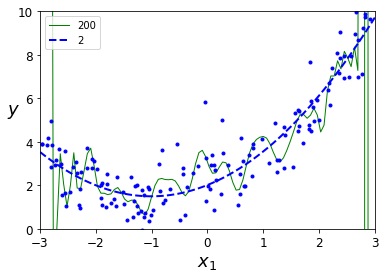

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 200), ("b--", 2, 2)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("images/poly_plots.png", bbox_inches='tight')
plt.show()

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Comments.</h3></center>
<ul>
    <li>In this example, the <font color="blue">blue line</font> is a polynomial with a degree of 2. Essentially the same plot as in the previous example.</li><br>
    <li>The <font color="green">green line</font> is a polynomial with a degree of 200.</li><br>
    <li>As you can see in the green curve, the higher dimensionality makes the curve oscillate up and down trying to capture as best as possible, the scatter in the data.</li><br>
    <li>This closer fit to the data translates to improved learning of the data.</li><br>      
  <li><font color="red">Although learning the data is good for machine learning, it poses a problem if the model learns too much, that it becomes regid, and is unable to generalizing to new data.</font></li><br>
  <li><font color="black">This is where learning curves come into play, they allow us to diagnose issues of "too much learning", or not "learning enough", which would ultimately make the model unable to make good predictions.</font></li>    
</ul>
</div>

<hr style="border-top: 3px solid Black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>The Goldie Locks Complex in Model Complexity.</h3></center>
<ul>
    <li>As illustrated in the plot below, models that overfit the training data <font color="green">(high-degree polynomial regression, green curve)</font> will not generalize well with new data.</li><br>
    <li>Models that underfit the data <font color="red">(linear model, red line)</font>, will not generalize well with the training, and new data.</li><br>
    <li>The model that generalizes best is in the Goldie Locks zone; it fits the data, but not excessively, as is displayed in can be seen with the <font color="blue">blue line, quadratic model</font>.</li><br>
        <li>One way to determine is a model is to simple, or too complex, is to use <em>learning curves</em>.</li>
</ul>
</div>

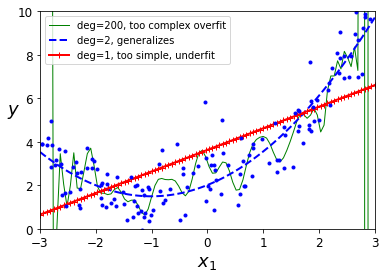

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree, label in (("g-", 1, 200, "deg=200, too complex overfit"), ("b--", 2, 2, "deg=2, generalizes"), ("r-+", 2, 1, "deg=1, too simple, underfit")):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig("images/comparison_poly_linreg_plots.png", bbox_inches='tight')
plt.show()

<hr style="border-top: 3px solid Black;">

<div style="font-size:16px; border:1px solid black; padding:10px">
        <center><h3>Learning Curves: Spilling the "Tea" on over or under performing ML Models.</h3></center>
<ul>
    <li>Models that overfit the training data will not generalize well with new data.</li><br>
    <li>Models that underfit the data, will not generalize well with the training, and validation datasets.</li><br>
    <li>Learning curves can further help diagnose if either of these are problems with the model used.</li><br>
    <li>Learning models plots the following:
        <ul>
            <li>x-axis: the size of the training set data</li>
            <li>y-axis: the root mean square error (loss, or error in predictions).</li>
        </ul>
    </li>        
</ul>        
</div>

<h1>Diagnosing the learning curve of the plain Linear Regression Model (underfit/too simple)</h1>

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

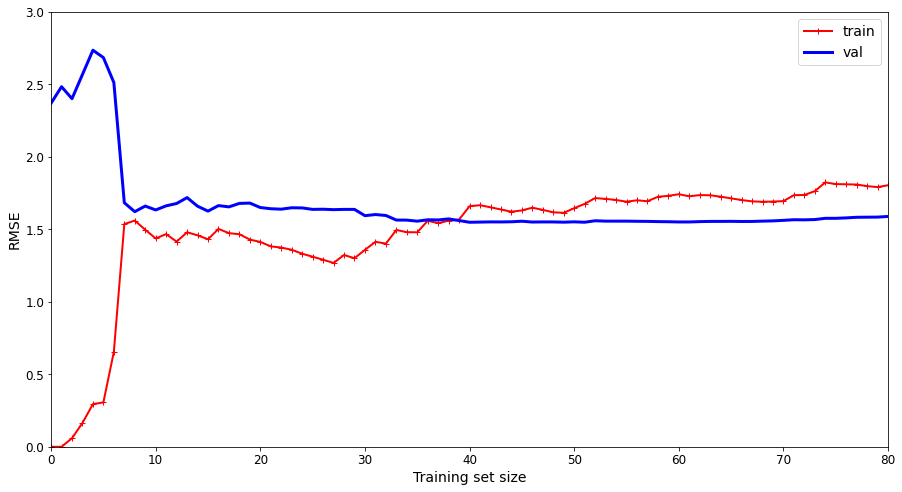

In [15]:
plt.figure(figsize=(15,8))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.savefig("images/underfit_lc.png", bbox_inches='tight')
plt.show()                                     

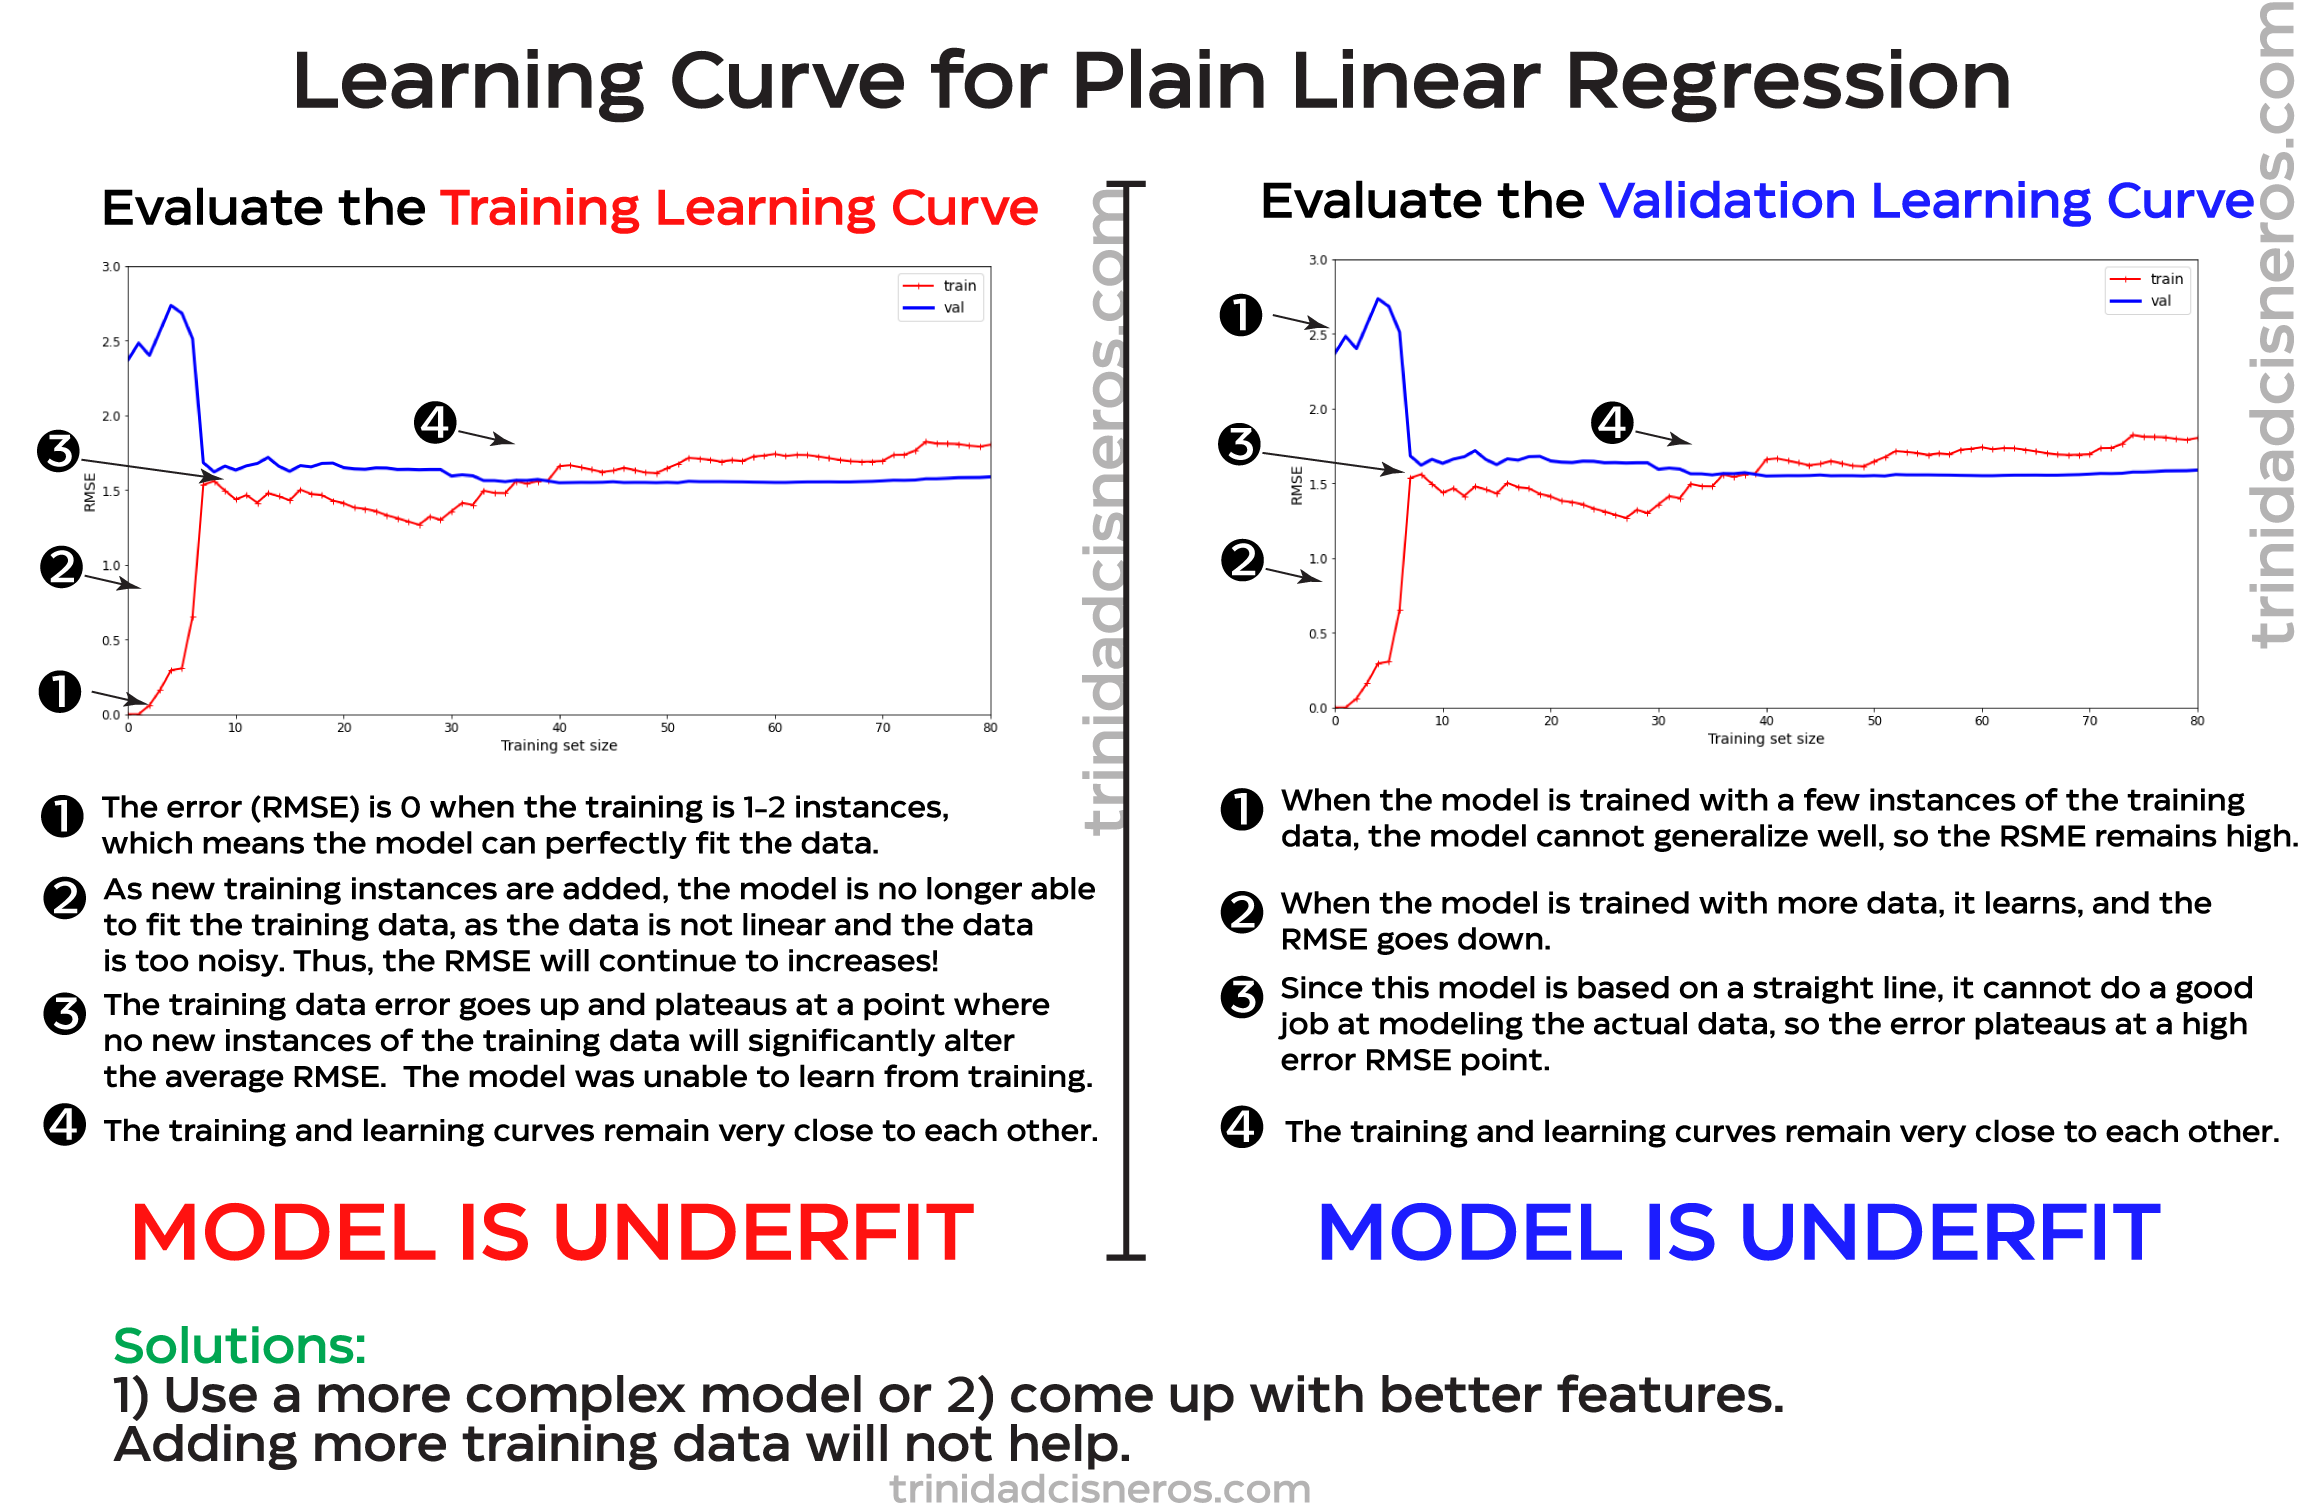

In [16]:
image = os.path.join(path, 'images/underfit_explanation.png')
Image(filename=image)

<hr style="border-top: 3px solid Black;">

<h1>Diagnosing overfit models</h1>

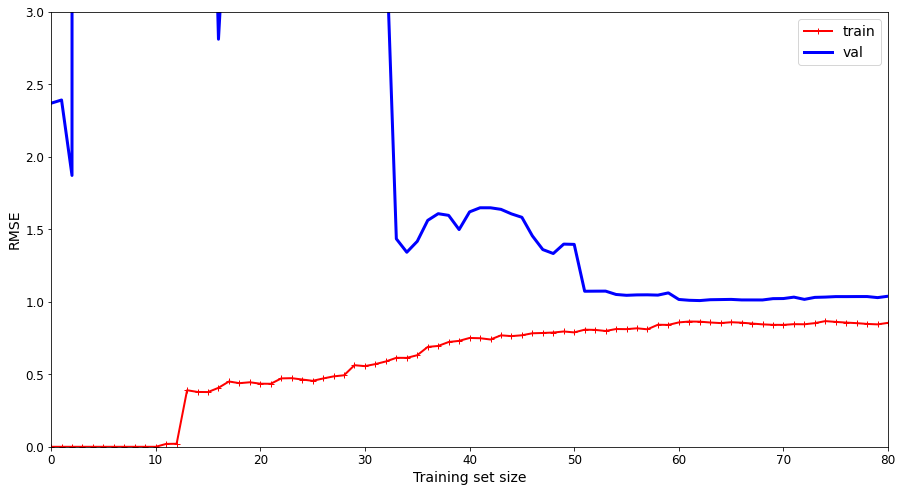

In [17]:
from sklearn.pipeline import Pipeline
plt.figure(figsize=(15,8))
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.savefig("images/overfit_lc.png", bbox_inches='tight')
plt.show()

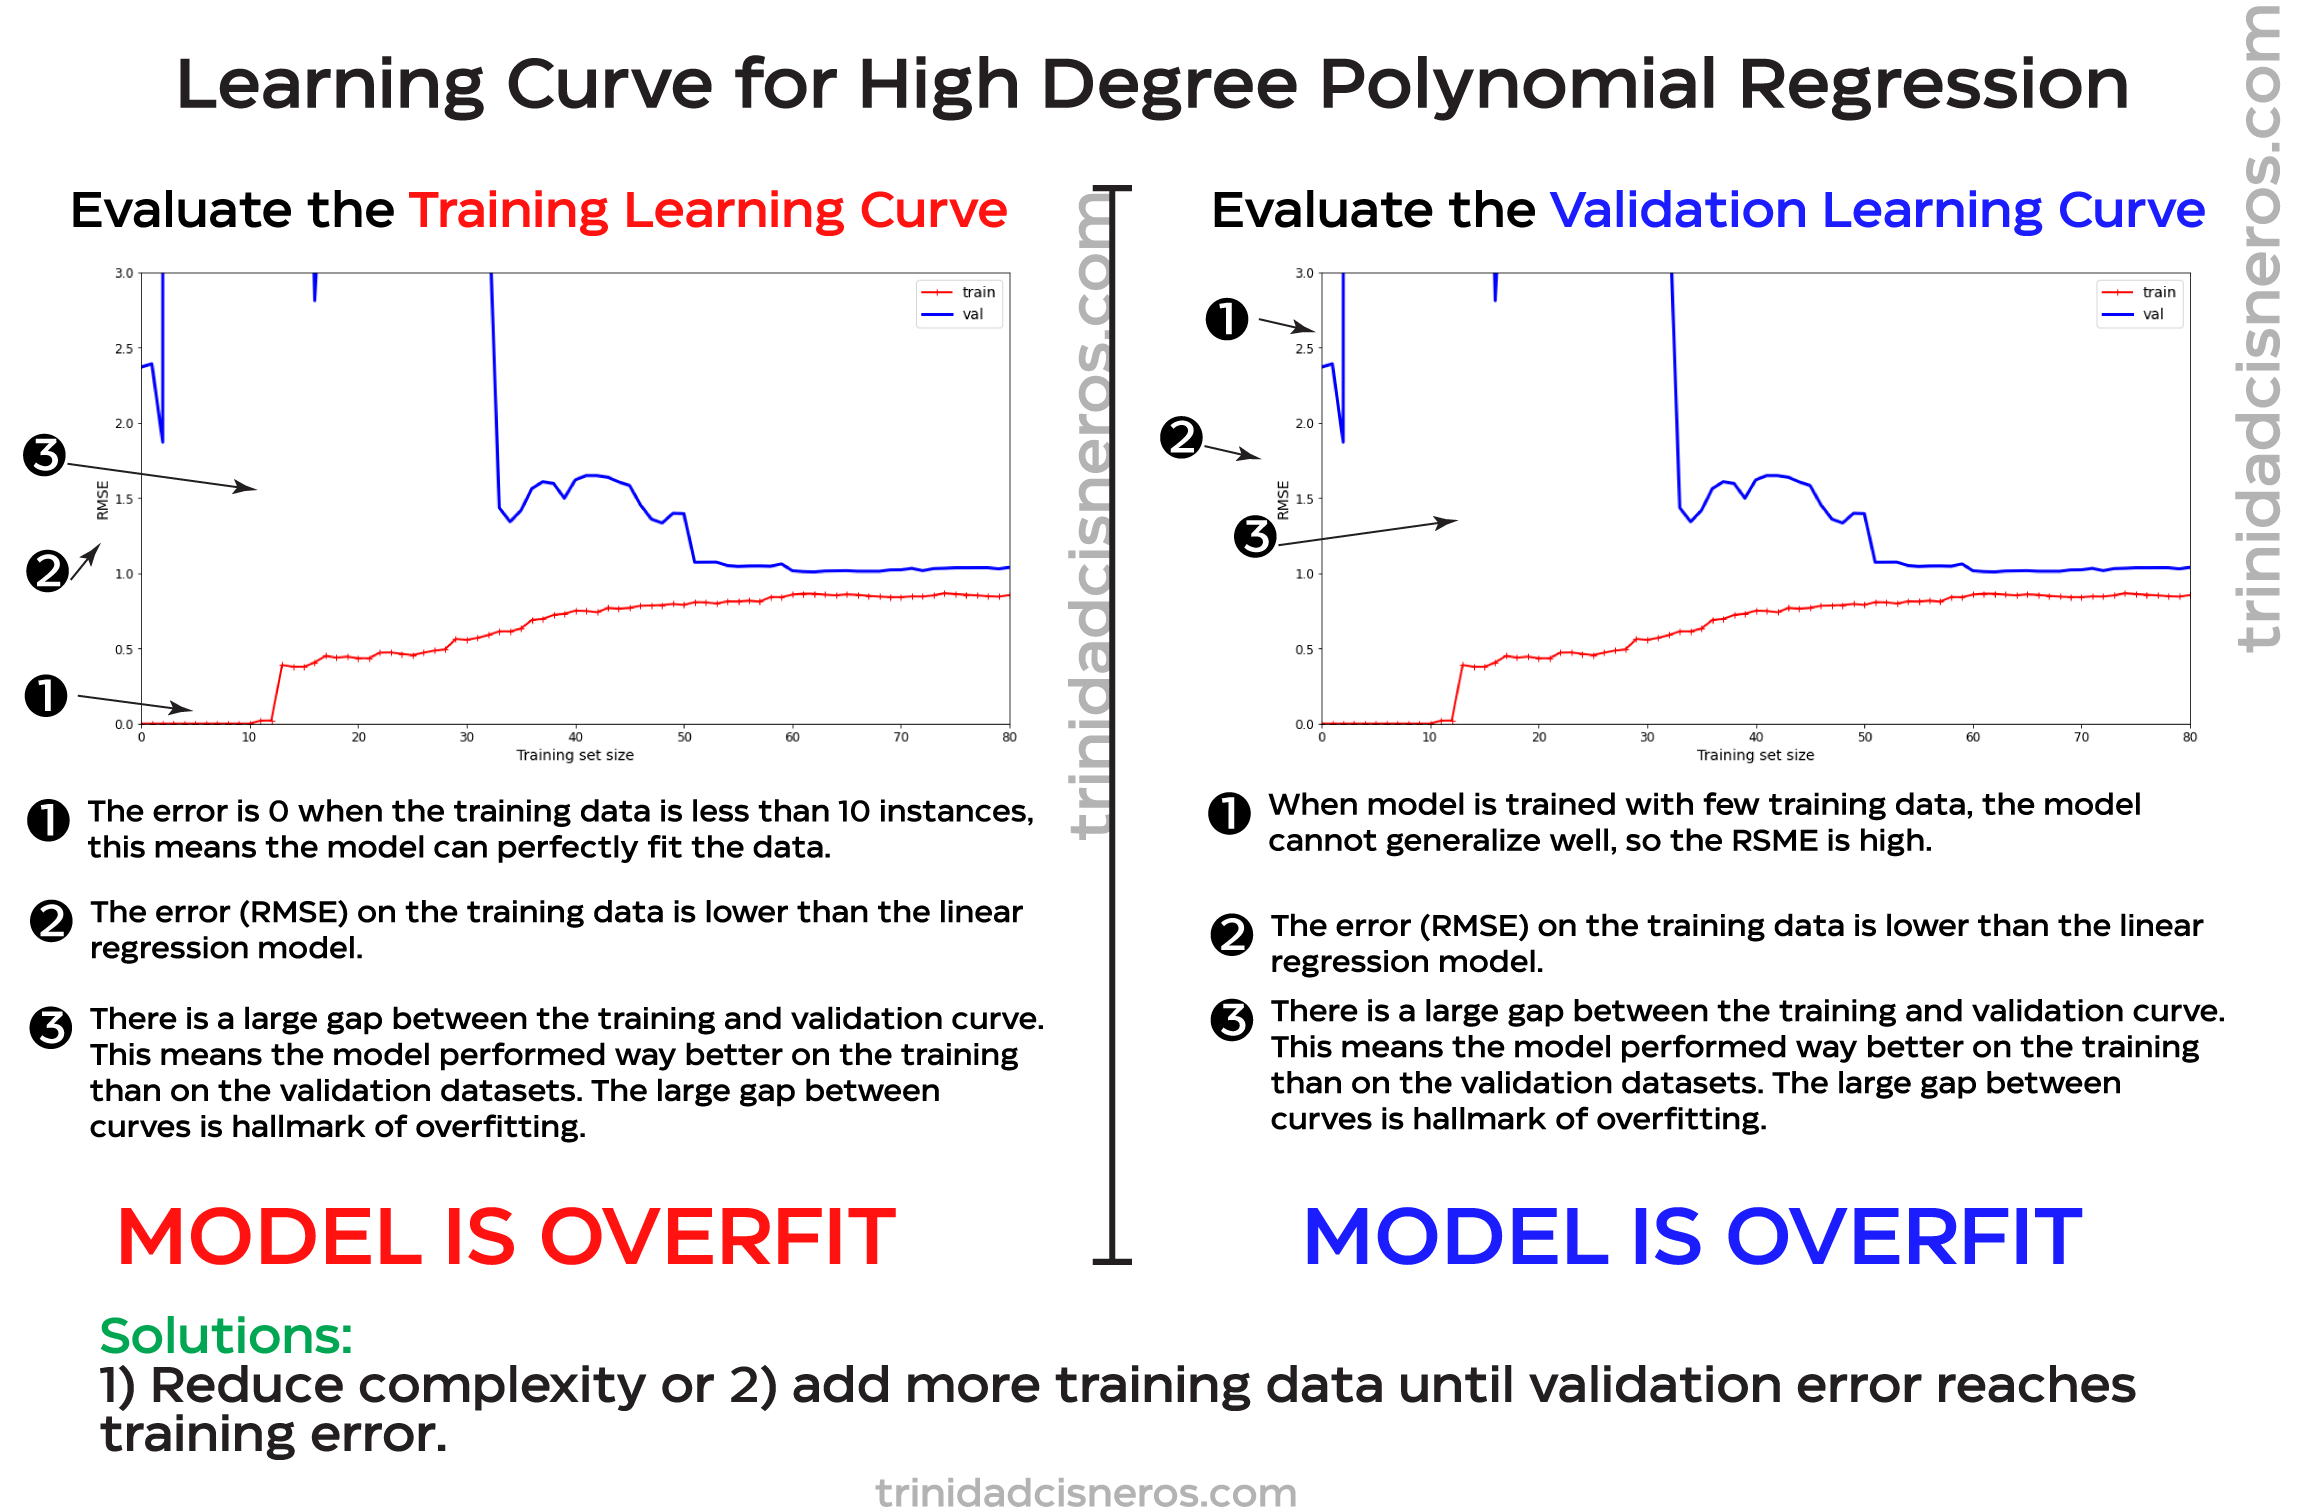

In [18]:
image = os.path.join(path, 'images/overfit_explanation.png')
Image(filename=image)

<hr style="border-top: 3px solid Black;">

<h1>Diagnosing ideal models</h1>

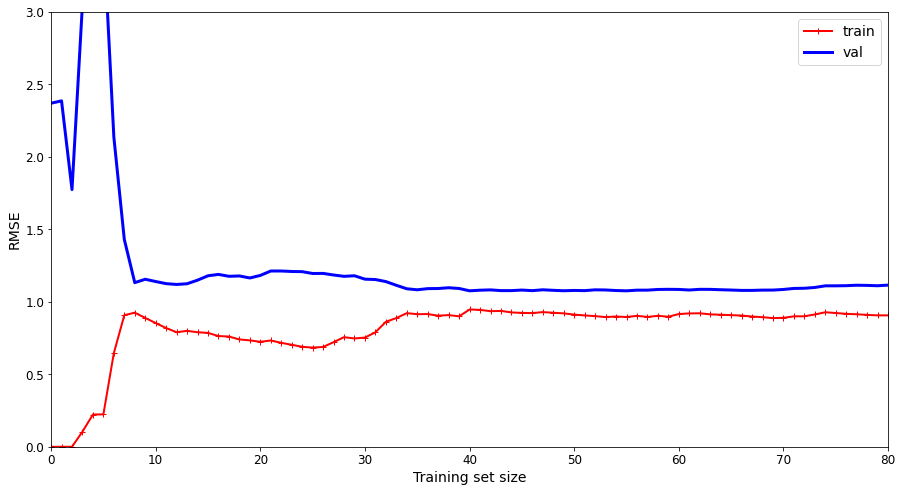

In [19]:
from sklearn.pipeline import Pipeline
plt.figure(figsize=(15,8))
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.savefig("images/fit_lc.png", bbox_inches='tight')
plt.show()

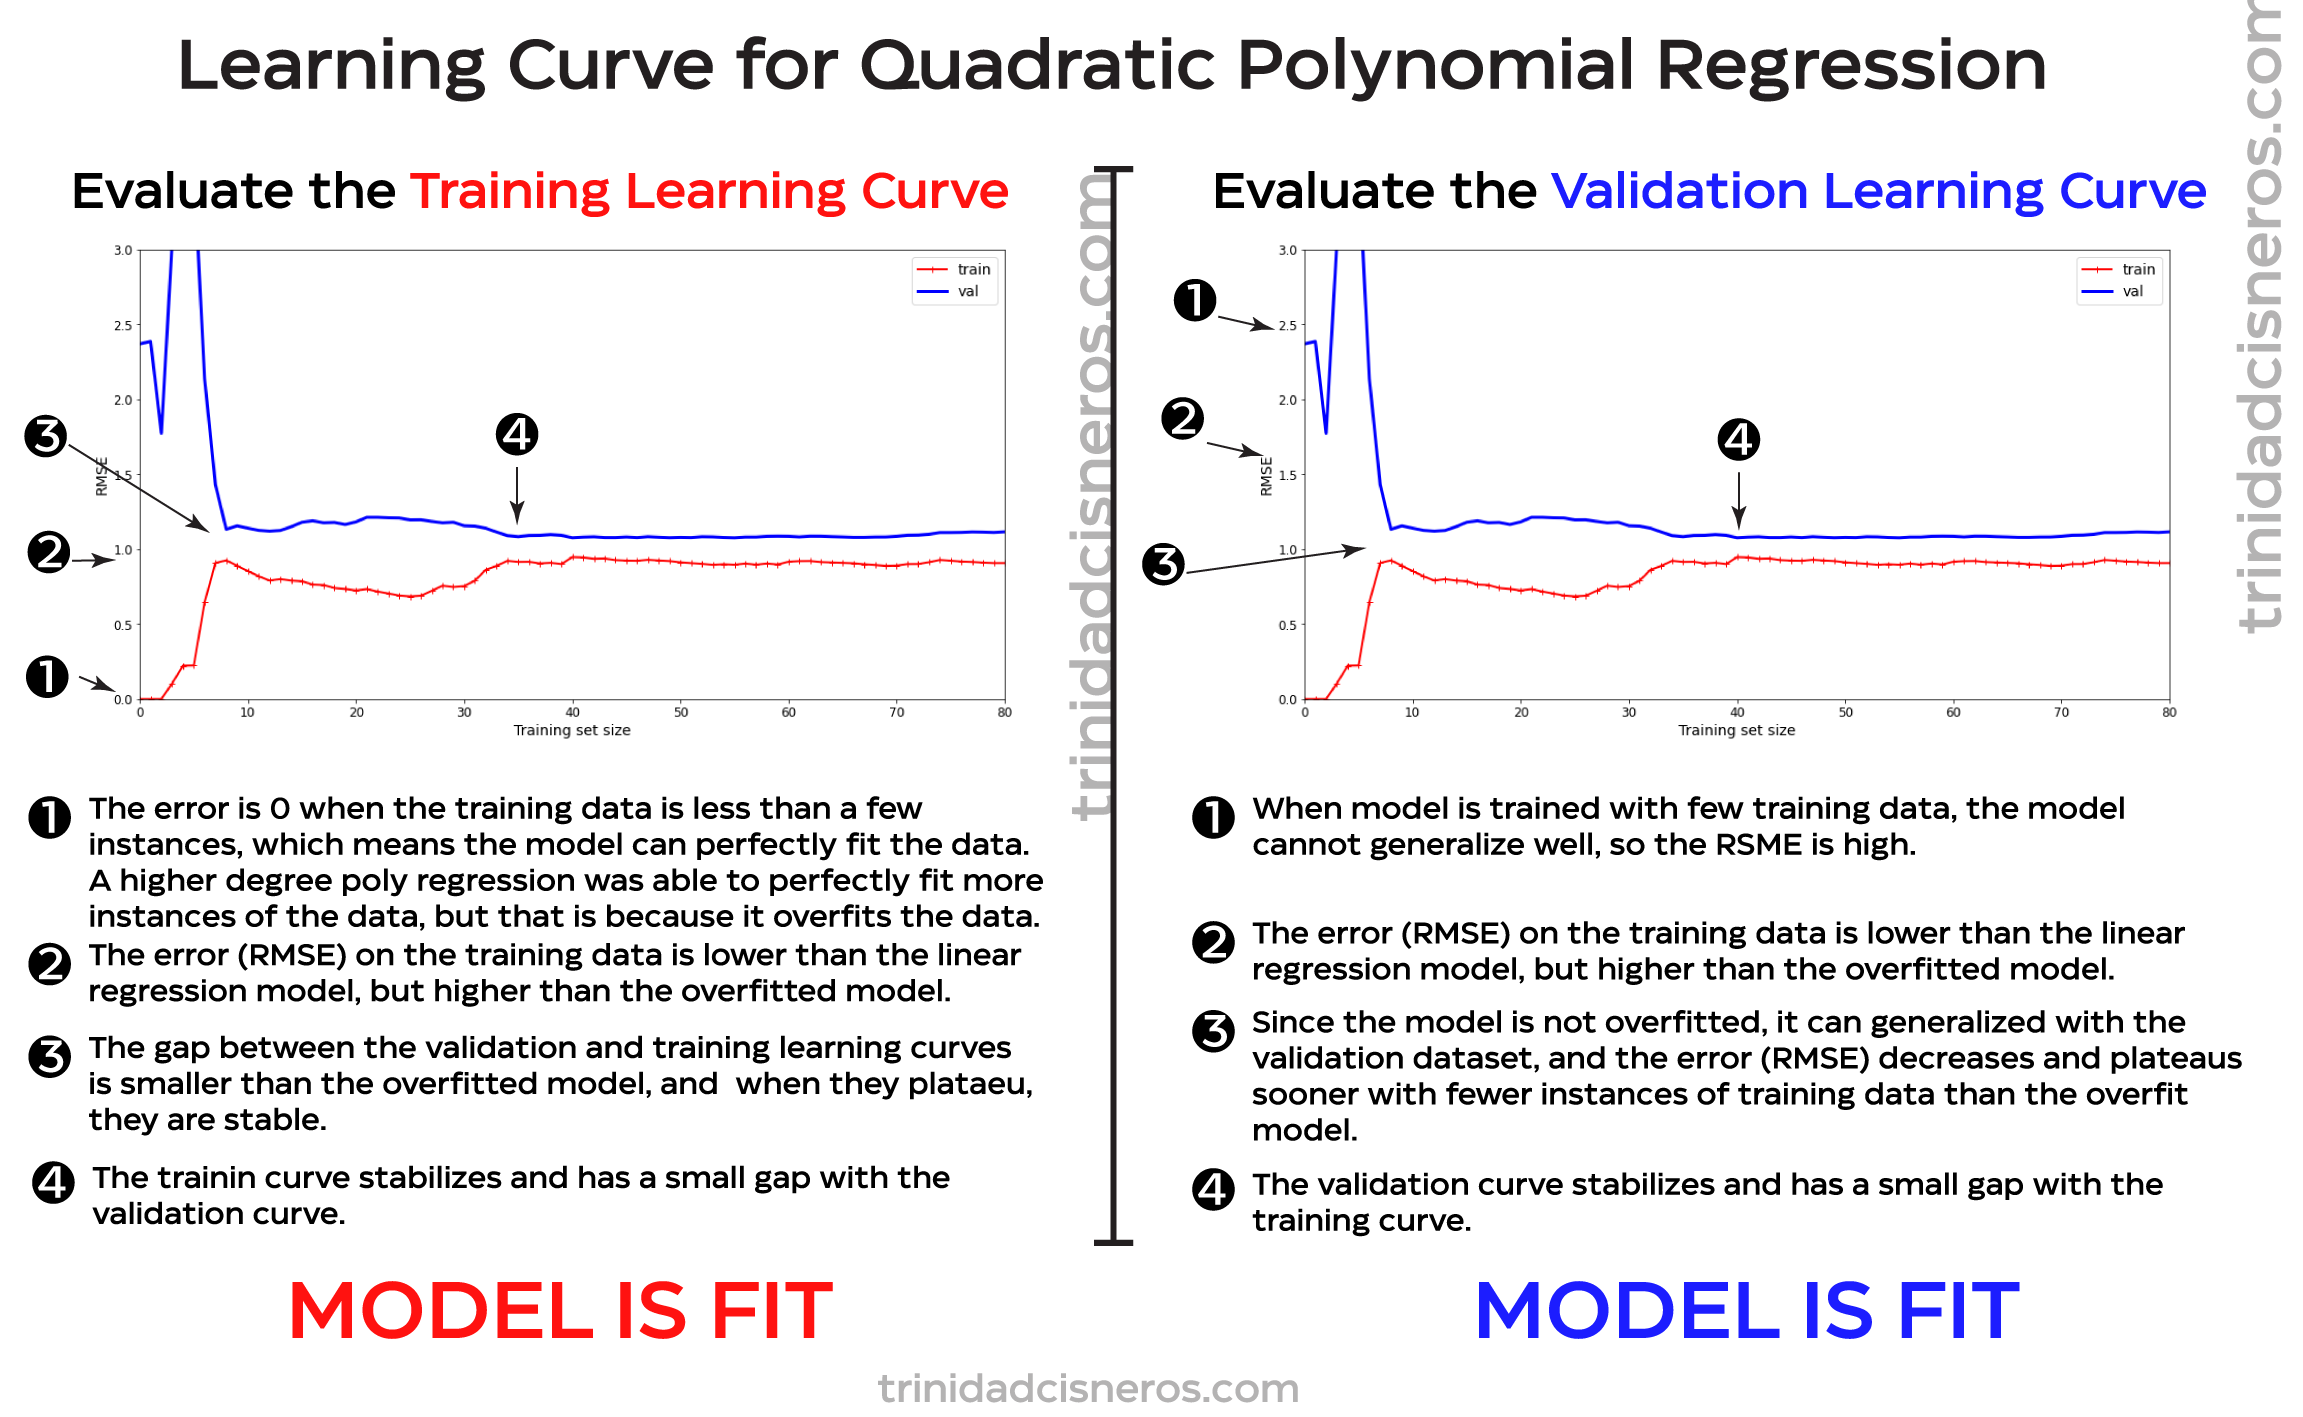

In [20]:
image = os.path.join(path, 'images/fit_explanation.png')
Image(filename=image)